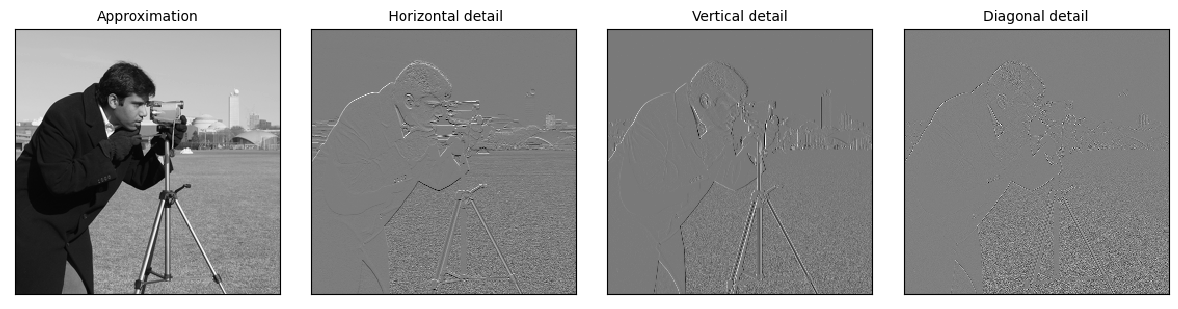

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3', mode="periodization")
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [12]:
print(original.shape)
print(len(coeffs2))
print(coeffs2[0].shape)
print(coeffs2[1][0].shape)

(512, 512)
2
(256, 256)
(256, 256)


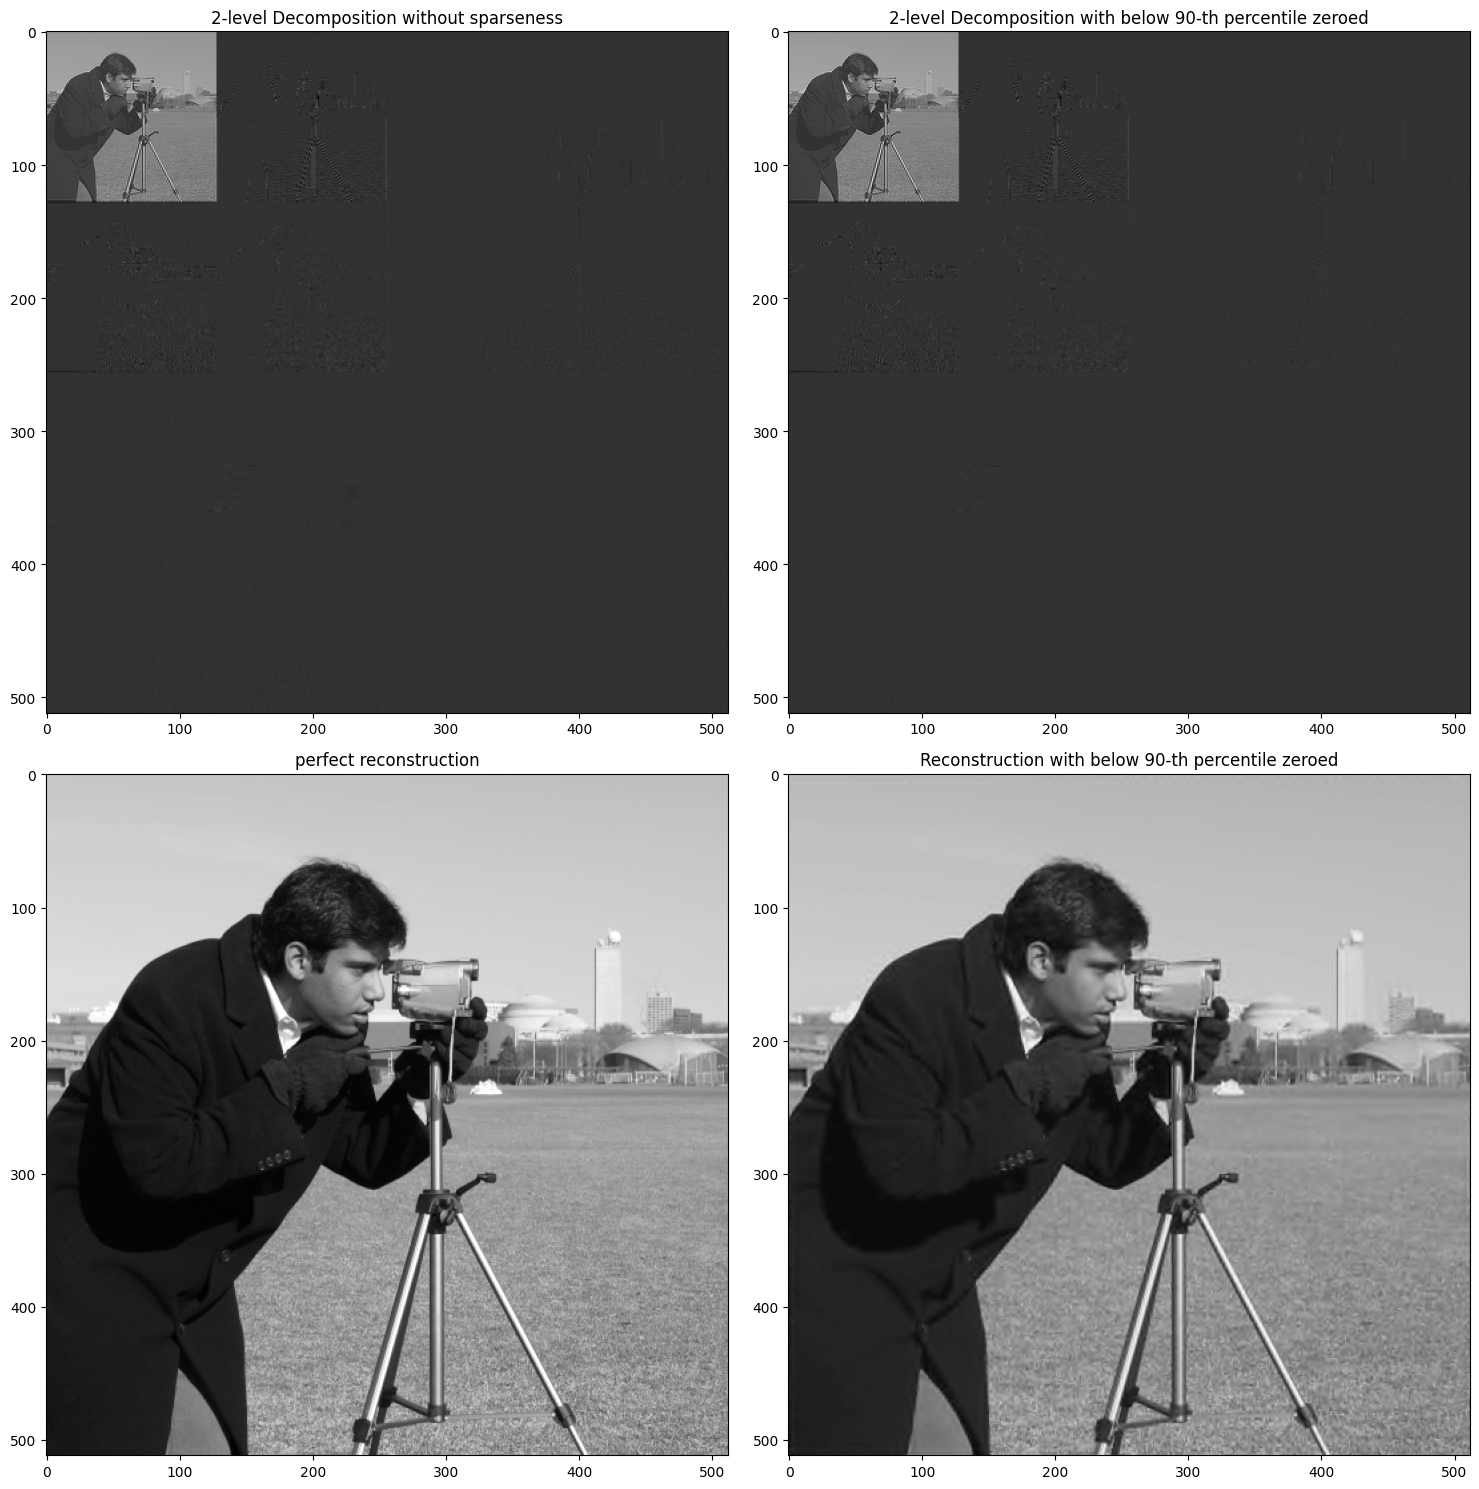

In [28]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

plt.figure(figsize=(15,15))
x = pywt.data.camera().astype(np.float32)
x /= x.max()
shape = x.shape

percent = 90
filt = 'bior3.9'

# how many levels of decomposition to draw
max_lev = 2

# compute the 2D DWT
c = pywt.wavedec2(x, filt, mode='periodization', level=max_lev)

# normalize each coefficient array independently for better visibility
# c[0] /= np.abs(c[0]).max()
# for detail_level in range(max_lev):
#     c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
# c[0] = np.zeros_like(c[0])

xhat = pywt.waverec2(c, filt, mode="periodization")
plt.subplot(2,2,3)
plt.imshow(xhat, cmap=plt.cm.gray)
plt.title("perfect reconstruction")

# convert to one array
arr, slices = pywt.coeffs_to_array(c)
plt.subplot(2,2,1)
plt.imshow(arr, cmap=plt.cm.gray)
plt.title(f"{max_lev}-level Decomposition without sparseness")

# zero coefficients below percentile
p = np.percentile(abs(arr), percent)
arr[abs(arr) < p] = 0 # zero coefficients only close to 0
c_ = pywt.array_to_coeffs(arr, slices, output_format='wavedec2')
x_ = pywt.waverec2(c_, filt, mode="periodization")

plt.subplot(2,2,2)
plt.imshow(arr, cmap=plt.cm.gray)
plt.title(f"{max_lev}-level Decomposition with below {percent}-th percentile zeroed")
plt.subplot(2,2,4)
plt.imshow(x_, cmap=plt.cm.gray)
plt.title(f"Reconstruction with below {percent}-th percentile zeroed")

plt.tight_layout()
plt.show()

In [29]:
print(arr.max())
print(arr.min())
print(p)
print(c_[0].shape)
print(c_[1][0].shape)


6.253713
-1.5231131
0.1209831863641739
(128, 128)
(128, 128)


In [32]:
def dec_img(img, l, percent):
    c = pywt.wavedec2(img, "db8", mode='periodization', level=l)
    arr, slices = pywt.coeffs_to_array(c)
    p = np.percentile(abs(arr), percent)
    arr[abs(arr) < p] = 0 # zero coefficients only close to 0
    thumbnail = arr[slices[0]] # get slices of image
    ad = arr[slices[1]['ad']]
    dd = arr[slices[1]['dd']]
    da = arr[slices[1]['da']]
    combined = ad + dd + da # adding three high freq images together
    stacked = np.stack([thumbnail, combined], axis=0) # returns shape [2, H/2^l, W/2^l]
    return stacked

def dec_img_multichannel(img, l, percent):
    decs = []
    for channel in img:
        decs.append(dec_img(channel, l, percent))

    stacked = np.vstack(decs)
    return stacked # returns shape [2*num_channels, H/2^l, W/2^l]

In [33]:
x = pywt.data.camera().astype(np.float32)
x /= x.max()
wave_dec = dec_img(x, 2, 90)

x_3ch = np.stack([x,x,x])
wave_dec_3ch = dec_img_multichannel(x_3ch, 2, 90)
print(wave_dec_3ch.shape)

(6, 128, 128)


In [68]:
print(pywt.families())
print(pywt.wavelist(kind='discrete'))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym1